### Module 가져오기

In [242]:
# Analysing
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
import missingno as msno

# Others
import warnings
warnings.filterwarnings('ignore')
import gc
import os
from os.path import join

### Data 가져오기

In [243]:
train_data_path = join('/Users/GW/conda/kaggle/2ndml','train.csv')
test_data_path = join('/Users/GW/conda/kaggle/2ndml','test.csv')

In [244]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

### 전반적으로 살피기

In [245]:
# 데이터 형태 살피기
print("train data shape : ",train.shape)
print("test data shape  : ",test.shape)
set(train.columns) - set(test.columns)

train data shape :  (15035, 21)
test data shape  :  (6468, 20)


{'price'}

In [246]:
# total 데이터 프레임 제작
totalxy = pd.concat((train,test), axis=0)
totalx = totalxy.copy()
del totalx['price']
print(train.info(),'\n')
print(test.info(),'\n')
print(totalxy.info(),'\n')
print(totalx.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB
None 

<class 'pand

In [247]:
# train 속성들 구해놓기
train_len = len(train)
train_y = train['price']

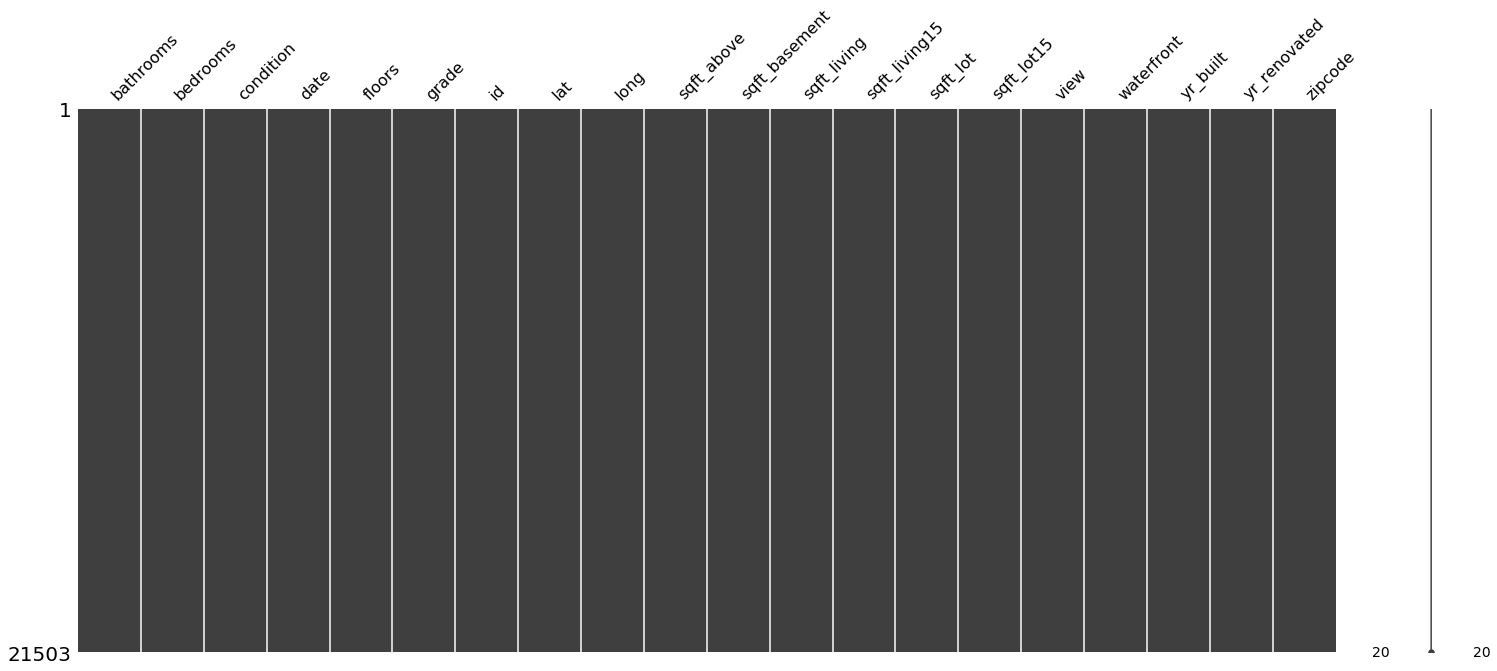

In [248]:
# 결측 값 확인 1 - 그래프
msno.matrix(totalx)

In [249]:
# 결측 값 확인 2 - 수치
print("missing data : ","\n",totalx.isna().sum())
print("missing data_price : ",totalxy.isna().sum())
## 결측 값 없으니 => 이후 별도로 처리해 줄 필요 없음

missing data :  
 bathrooms        0
bedrooms         0
condition        0
date             0
floors           0
grade            0
id               0
lat              0
long             0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
view             0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64
missing data_price :  bathrooms           0
bedrooms            0
condition           0
date                0
floors              0
grade               0
id                  0
lat                 0
long                0
price            6468
sqft_above          0
sqft_basement       0
sqft_living         0
sqft_living15       0
sqft_lot            0
sqft_lot15          0
view                0
waterfront          0
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64


In [250]:
default_check = pd.concat([totalxy.isnull().sum(), totalxy.dtypes, totalxy.nunique(), totalxy.describe().T], axis=1)
default_check.rename(columns={0:'NULL', 1:'TYPE', 2:'UNIQUE'}, inplace=True)
default_check

,NULL,TYPE,UNIQUE,count,mean,std,min,25%,50%,75%,max
bathrooms,0,float64,30,21503.0,2.116042,0.770018,0.0000,1.7500,2.2500,2.5000,8.000000e+00
bedrooms,0,int64,13,21503.0,3.371762,0.930026,0.0000,3.0000,3.0000,4.0000,3.300000e+01
condition,0,int64,5,21503.0,3.409710,0.650066,1.0000,3.0000,3.0000,4.0000,5.000000e+00
date,0,object,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,0,float64,6,21503.0,1.495140,0.540183,1.0000,1.0000,1.5000,2.0000,3.500000e+00
grade,0,int64,12,21503.0,7.659164,1.174422,1.0000,7.0000,7.0000,8.0000,1.300000e+01
id,0,int64,21503,21503.0,10751.000000,6207.525755,0.0000,5375.5000,10751.0000,16126.5000,2.150200e+04
lat,0,float64,5034,21503.0,47.560121,0.138615,47.1559,47.4711,47.5719,47.6781,4.777760e+01
long,0,float64,752,21503.0,-122.213786,0.140833,-122.5190,-122.3280,-122.2300,-122.1250,-1.213150e+02
price,6468,float64,3263,15035.0,540682.653143,371524.660390,78000.0000,322000.0000,450000.0000,645000.0000,7.700000e+06


### 피쳐엔지니어링

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([  78000.,   80000.,   81000., ..., 6885000., 7062500., 7700000.])),
 (311259.39937053964, 540682.653142667, 0.8376098994462501))

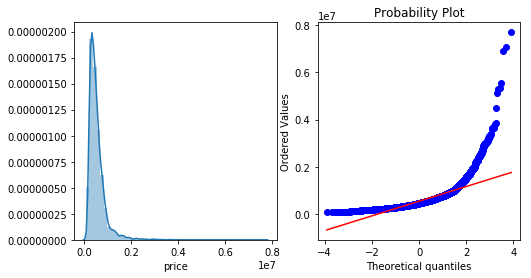

In [251]:
# 목적 변수 정규화 - 정규화 정도 확인
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(train['price'], ax=ax1)
stats.probplot(train['price'], plot=plt)



((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([11.26447693, 11.28979441, 11.30221678, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5246386762816584, 13.04812230186611, 0.9944175231748045))

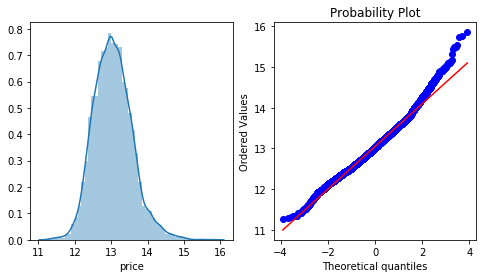

In [252]:
# 목적 변수 정규화 - 정규화 
totalxy['price'] = np.log1p(totalxy['price'])
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(totalxy['price'][:train_len], ax=ax1)
stats.probplot(totalxy['price'][:train_len], plot=plt)

#### 이상치 처리

In [253]:
# 이상치 체크1 - Describe (mean 대비, min or max 과도한것 살핌)
totalxy.describe()
#1(sqft_living, sqft_lot, sqft_basement, sqft_lot15)
#2(sqft_abvoe)

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
count,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,15035.000000,21503.000000,21503.000000,21503.000000,21503.000000,2.150300e+04,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000
mean,2.116042,3.371762,3.409710,1.495140,7.659164,10751.000000,47.560121,-122.213786,13.048122,1789.765986,291.675348,2081.441334,1987.242664,1.511715e+04,12774.529089,0.234618,0.007580,1971.055016,84.741943,98077.897968
std,0.770018,0.930026,0.650066,0.540183,1.174422,6207.525755,0.138615,0.140833,0.527471,828.481664,442.645882,918.669624,685.579479,4.147591e+04,27334.995914,0.766453,0.086737,29.372398,402.452836,53.489890
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,47.155900,-122.519000,11.264477,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000
25%,1.750000,3.000000,3.000000,1.000000,7.000000,5375.500000,47.471100,-122.328000,12.682310,1200.000000,0.000000,1430.000000,1490.000000,5.040000e+03,5100.000000,0.000000,0.000000,1951.000000,0.000000,98033.000000
50%,2.250000,3.000000,3.000000,1.500000,7.000000,10751.000000,47.571900,-122.230000,13.017005,1560.000000,0.000000,1914.000000,1840.000000,7.616000e+03,7620.000000,0.000000,0.000000,1975.000000,0.000000,98065.000000
75%,2.500000,4.000000,4.000000,2.000000,8.000000,16126.500000,47.678100,-122.125000,13.377007,2210.000000,560.000000,2550.000000,2370.000000,1.068600e+04,10085.000000,0.000000,0.000000,1997.000000,0.000000,98117.000000
max,8.000000,33.000000,5.000000,3.500000,13.000000,21502.000000,47.777600,-121.315000,15.856731,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,4.000000,1.000000,2015.000000,2015.000000,98199.000000


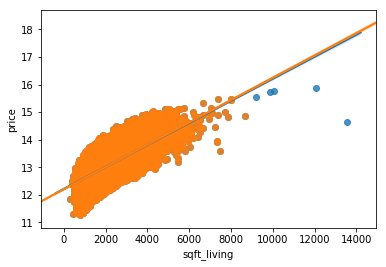

In [254]:
#1. sqft_living
fig = sns.regplot(x='sqft_living', y='price', data=totalxy)
totalxy = totalxy.drop(totalxy[(totalxy['sqft_living']>9000)].index)
fig = sns.regplot(x='sqft_living', y='price', data=totalxy)

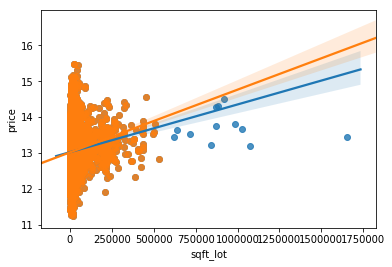

In [255]:
#2. sqft_lot
fig = sns.regplot(x='sqft_lot', y='price', data=totalxy)
totalxy = totalxy.drop(totalxy[totalxy['sqft_lot']>600000].index)
fig = sns.regplot(x='sqft_lot', y='price', data=totalxy)

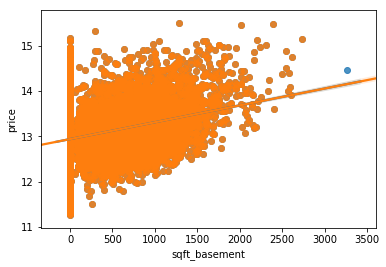

In [256]:
#3. sqft_basement
fig = sns.regplot(x='sqft_basement', y='price', data=totalxy)
totalxy = totalxy.drop(totalxy[totalxy['sqft_basement']>2900].index)
fig = sns.regplot(x='sqft_basement', y='price', data=totalxy)

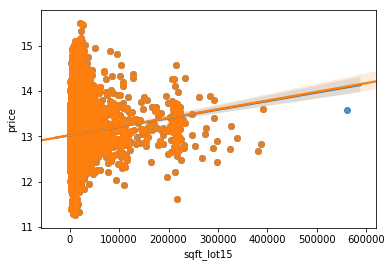

In [257]:
#4. sqft_lot15
fig = sns.regplot(x='sqft_lot15', y='price', data=totalxy)
totalxy = totalxy.drop(totalxy[totalxy['sqft_lot15']>500000].index)
fig = sns.regplot(x='sqft_lot15', y='price', data=totalxy)

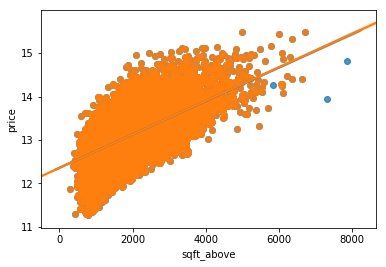

In [258]:
#5. sqft_above
fig = sns.regplot(x='sqft_above', y='price', data=totalxy)
totalxy = totalxy.drop(totalxy[totalxy['sqft_above']>7000].index)
fig = sns.regplot(x='sqft_above', y='price', data=totalxy)

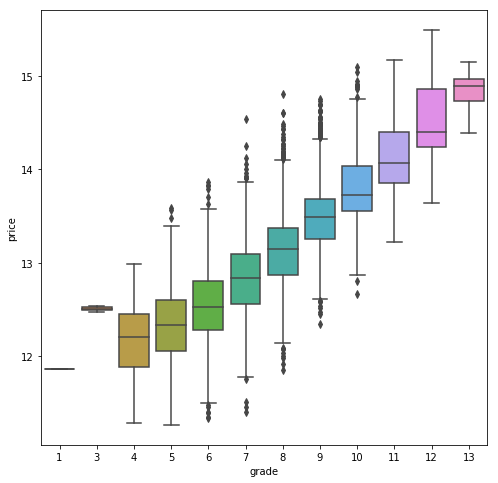

In [259]:
# 이상치 체크 - Boxplot
plt.figure(figsize=(8,8))
boxplot = sns.boxplot(x='grade', y='price', data=totalxy)
## 7, 8, 10제거

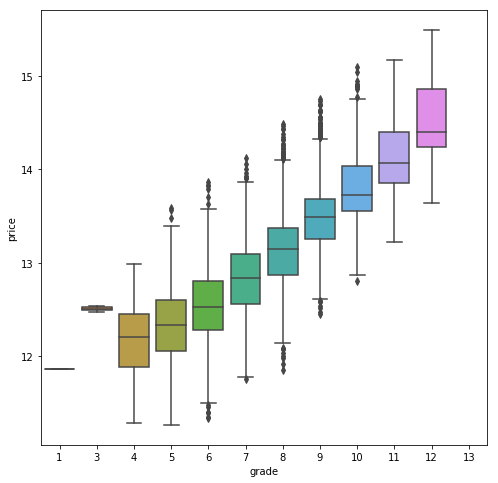

In [260]:
# 이상치 제거 - 
totalxy = totalxy.drop(totalxy[(totalxy['grade']==7)&(totalxy['price']>14.2)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==7)&(totalxy['price']<11.6)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==8)&(totalxy['price']>14.5)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==9)&(totalxy['price']<12.4)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==10)&(totalxy['price']<12.8)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==11)&(totalxy['price']>15.5)].index)
totalxy = totalxy.drop(totalxy[(totalxy['grade']==13)&(totalxy['price']<15.5)].index)

plt.figure(figsize=(8,8))
boxplot = sns.boxplot(x='grade', y='price', data=totalxy)

### 데이터 정규화

1) 날짜 맞추기
2) 인덱스 제거

In [261]:
# 날짜형식 맞추기
totalxy['date'] = totalxy['date'].apply(lambda x:x[0:8])
totalxy.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3,3,20141013,1.0,7,0,47.5112,-122.257,12.309987,...,0,1180,1340,5650,5650,0,0,1955,0,98178
1,1.00,2,3,20150225,1.0,6,1,47.7379,-122.233,12.100718,...,0,770,2720,10000,8062,0,0,1933,0,98028
2,2.00,3,3,20150218,1.0,8,2,47.6168,-122.045,13.142168,...,0,1680,1800,8080,7503,0,0,1987,0,98074
3,2.25,3,3,20140627,2.0,7,3,47.3097,-122.327,12.458779,...,0,1715,2238,6819,6819,0,0,1995,0,98003
4,1.50,3,3,20150115,1.0,7,4,47.4095,-122.315,12.583999,...,0,1060,1650,9711,9711,0,0,1963,0,98198


In [262]:
# id 필요 없으니 정리
id = totalxy['id']
del totalxy['id']

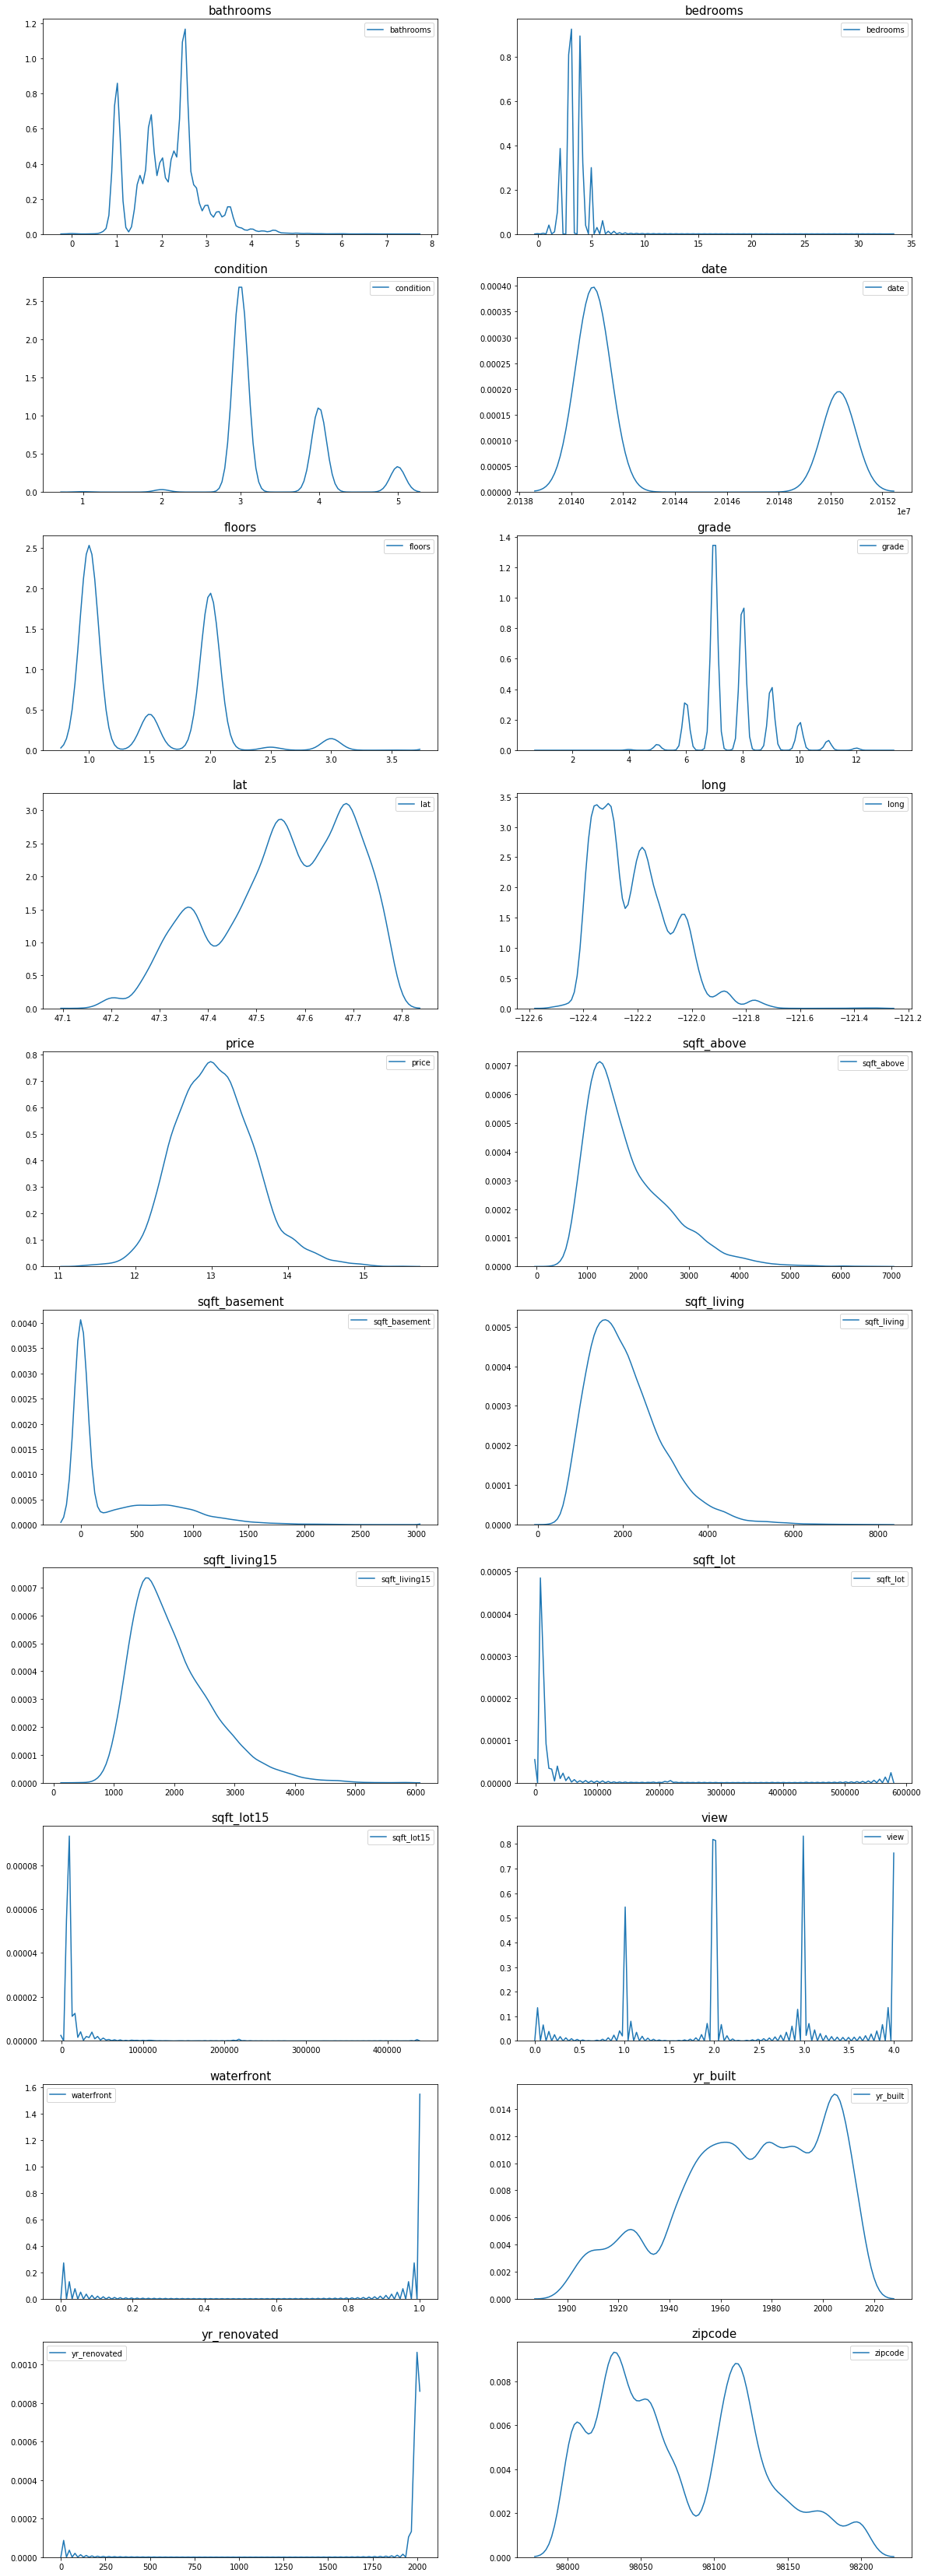

In [263]:
# 정규화가 필요한 것들 골라내기
#1) features which have lots of specific value
totalxy.nunique()>100
##(id, date, price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15)
#2) delete strange things
##(sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15)
#3) find not-normalized features
#4) check in images
##(sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15)

fig, ax = plt.subplots(10,2,figsize=(20,60))
count = 0
columns = totalxy.columns
for row in range(10):
    for col in range(2) :
        sns.kdeplot(totalxy[columns[count]], ax = ax[row][col])
        ax[row][col].set_title(columns[count], fontsize = 15)
        count += 1
        if count == 21 :
            break


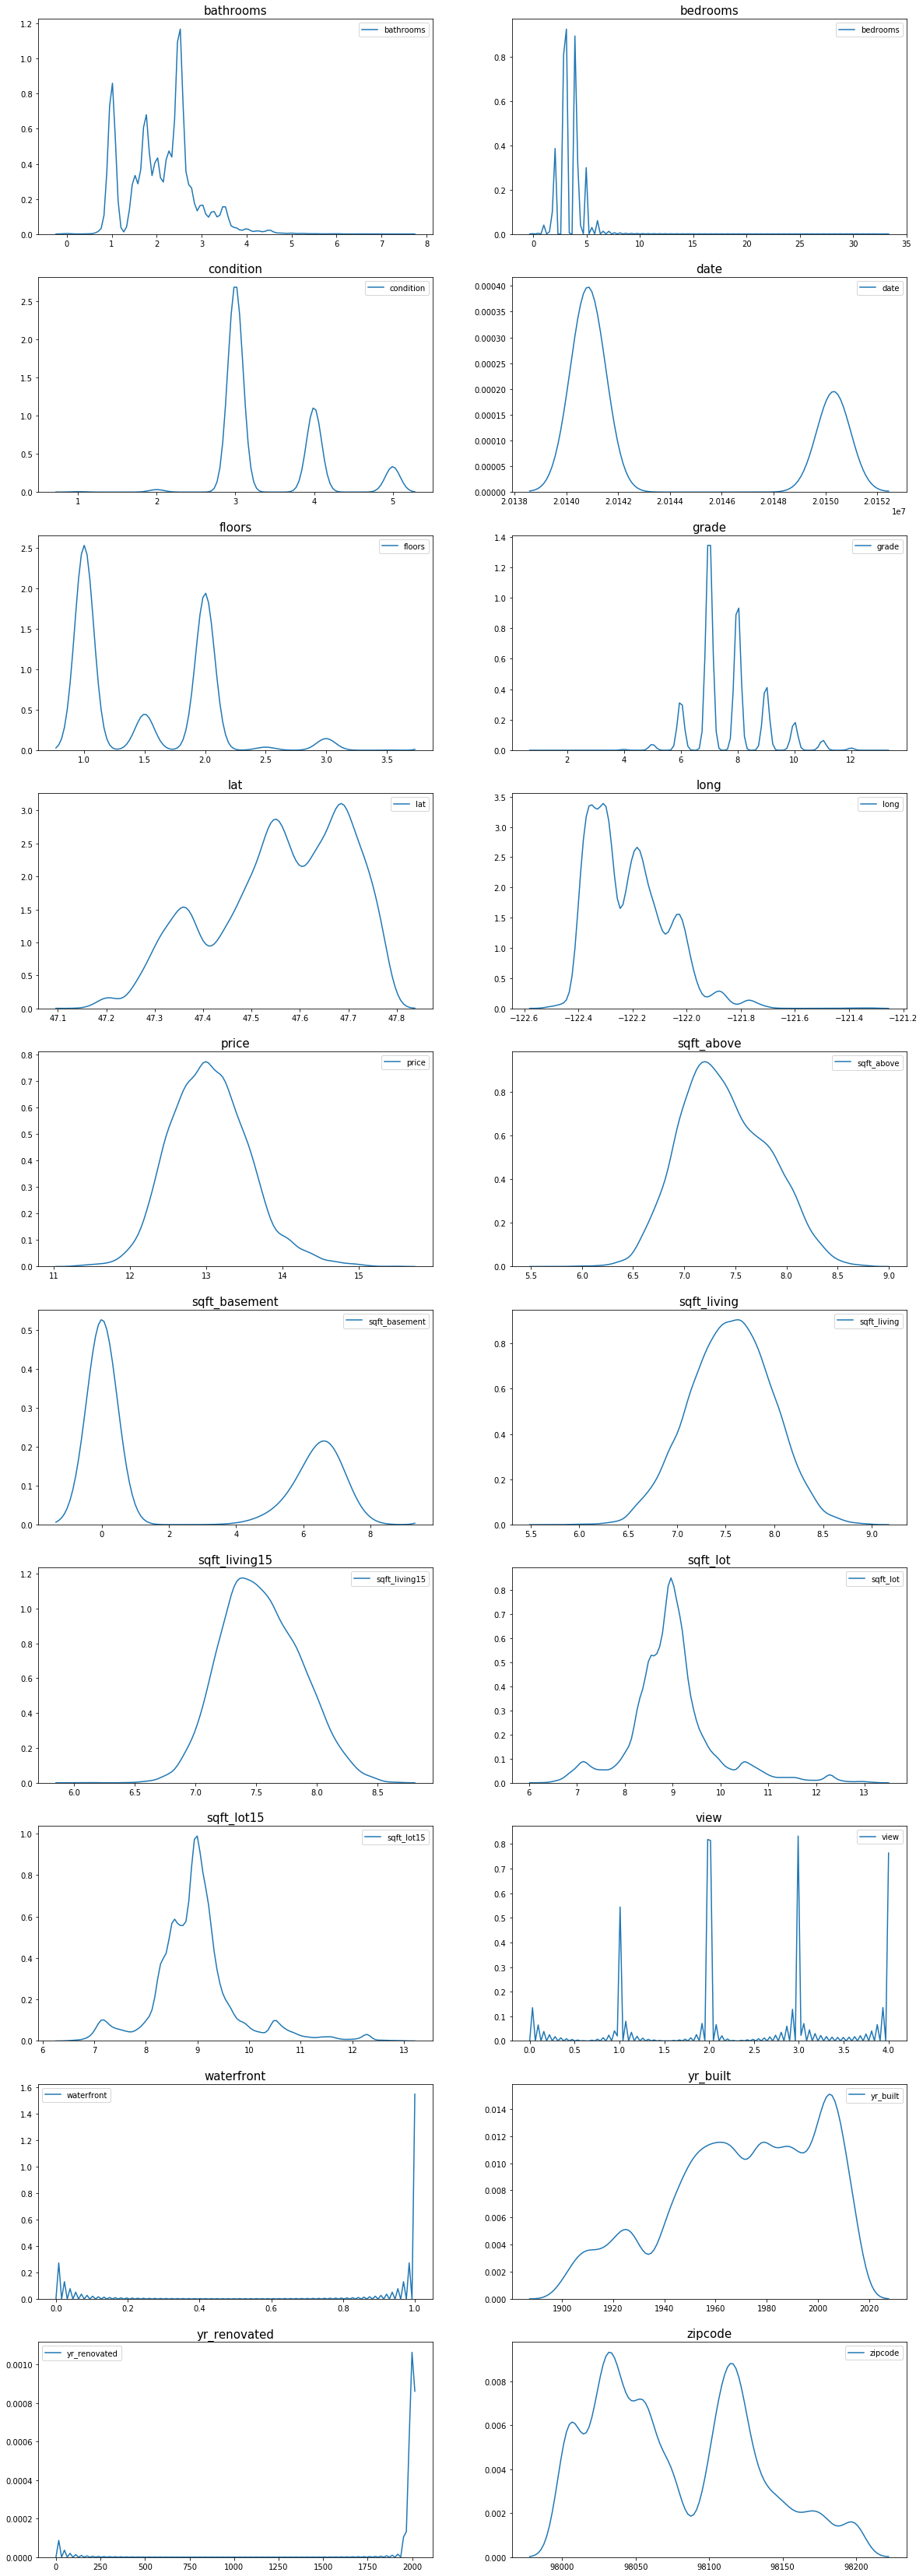

In [264]:

skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in skew_columns :
    totalxy[col] = np.log1p(totalxy[col].values)


fig, ax = plt.subplots(10,2,figsize=(20,60))
count = 0
columns = totalxy.columns
for row in range(10):
    for col in range(2) :
        sns.kdeplot(totalxy[columns[count]], ax = ax[row][col])
        ax[row][col].set_title(columns[count], fontsize = 15)
        count += 1
        if count == 21 :
            break


#### 데이터 수정

#### 필요 없는 것 제거

In [265]:
np.log1p(25)
np.expm1(3.258096538021482)

25.000000000000004

In [266]:
# price를 별도로 분리하기, 기존 데이터셋에선 price 제거
changed_len=len(totalxy['price'])-totalxy['price'].isna().sum()
total_y_train = totalxy['price'][:changed_len]
total_x = totalxy.copy()
del total_x['price']
total_y_train

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
5        13.403777
6        13.056226
7        12.644331
8        12.899222
9        13.180634
10       13.384729
11       12.886644
12       13.091906
13       12.149508
14       12.345839
15       12.861001
16       14.508658
17       12.439962
18       12.703816
19       12.358798
20       13.750440
21       13.410547
22       13.271647
23       13.440819
24       13.190024
25       12.683862
26       13.453106
27       13.369225
28       12.388398
29       13.312985
           ...    
15005    12.706851
15006    13.318754
15007    13.573440
15008    13.322772
15009    12.899097
15010    13.269059
15011    12.800783
15012    13.377007
15013    13.296093
15014    13.102163
15015    12.899097
15016    12.506181
15017    13.132316
15018    12.861001
15019    12.934831
15020    12.758523
15021    14.016409
15022    13.899853
15023    12.765691
15024    13.429776
15025    14.269766
15026    13.

In [267]:
# price 제거한거 train용과 test 용으로 나누기
total_x_train = total_x.iloc[:changed_len,:]
total_x_test = total_x.iloc[changed_len:,:]
total_x_train

,bathrooms,bedrooms,condition,date,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3,3,20141013,1.0,7,47.5112,-122.257,7.074117,0.000000,7.074117,7.201171,8.639588,8.639588,0,0,1955,0,98178
1,1.00,2,3,20150225,1.0,6,47.7379,-122.233,6.647688,0.000000,6.647688,7.908755,9.210440,8.995041,0,0,1933,0,98028
2,2.00,3,3,20150218,1.0,8,47.6168,-122.045,7.427144,0.000000,7.427144,7.496097,8.997271,8.923191,0,0,1987,0,98074
3,2.25,3,3,20140627,2.0,7,47.3097,-122.327,7.447751,0.000000,7.447751,7.713785,8.827615,8.827615,0,0,1995,0,98003
4,1.50,3,3,20150115,1.0,7,47.4095,-122.315,6.966967,0.000000,6.966967,7.409136,9.181118,9.181118,0,0,1963,0,98198
5,2.50,3,3,20150403,1.0,8,47.6007,-122.145,7.528869,7.438972,8.177797,7.701200,9.189831,9.096724,0,0,1965,0,98007
6,1.00,2,4,20140527,1.0,7,47.6900,-122.292,6.758095,5.707110,7.057037,7.193686,8.699681,8.699681,0,0,1942,0,98115
7,1.00,3,4,20140528,1.5,7,47.7558,-122.229,7.266129,0.000000,7.266129,7.484930,9.898576,9.449200,0,0,1927,0,98028
8,1.75,3,4,20141007,1.0,7,47.6127,-122.045,7.223296,0.000000,7.223296,7.223296,9.177920,9.231025,0,0,1977,0,98074
9,2.00,5,3,20150312,1.5,7,47.6700,-122.394,7.501634,0.000000,7.501634,7.215975,8.486940,8.486940,0,0,1900,0,98107


## 모델링

### Import Modules of Models

In [268]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

### Average Blending
여러가지 모델의 결과를 산술 평균을 통해 Blending 모델을 형성

In [269]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

#models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},{'model':lightgbm,'name':'LightGBM'}]
models = [{'model':lightgbm,'name':'LightGBM'}]



### Cross Validation
교차검증 : 모델의 성능을 평가하기 위함

In [270]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(total_x_train.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], total_x_train.values, total_y_train)), kf=kfold))
        

In [284]:
get_cv_score(models)

Model LightGBM CV score : 0.9008


### Make Submission

In [273]:
def AveragingBleding(models, x, y, sub_x):
    for m in models :
        m['model'].fit(x.values,y)
    predictions = np.column_stack([m['model'].predict(sub_x.values) for m in models])
    return np.mean(predictions, axis=1)


In [274]:
print(total_x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 15034
Data columns (total 19 columns):
bathrooms        14991 non-null float64
bedrooms         14991 non-null int64
condition        14991 non-null int64
date             14991 non-null object
floors           14991 non-null float64
grade            14991 non-null int64
lat              14991 non-null float64
long             14991 non-null float64
sqft_above       14991 non-null float64
sqft_basement    14991 non-null float64
sqft_living      14991 non-null float64
sqft_living15    14991 non-null float64
sqft_lot         14991 non-null float64
sqft_lot15       14991 non-null float64
view             14991 non-null int64
waterfront       14991 non-null int64
yr_built         14991 non-null int64
yr_renovated     14991 non-null int64
zipcode          14991 non-null int64
dtypes: float64(10), int64(8), object(1)
memory usage: 2.3+ MB
None


In [275]:
# test 데이터 맞추기
test['date'] = test['date'].apply(lambda x:x[0:8])
test_id = test['id']
del test['id']

In [276]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in skew_columns :
    test[col] = np.log1p(test[col].values)

In [277]:
print(test.info())
print(total_x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 19 columns):
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null float64
sqft_lot         6468 non-null float64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null float64
sqft_basement    6468 non-null float64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null float64
sqft_lot15       6468 non-null float64
dtypes: float64(10), int64(8), object(1)
memory usage: 960.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 15034
Data columns (total 19 

In [278]:
y_pred = AveragingBleding(models, total_x_train, total_y_train, test)

In [280]:
y_pred2 = np.expm1(y_pred)
y_pred2

array([442102.51356995, 371818.03880508, 576580.6343538 , ...,
       378015.90147279, 343507.60297926, 359098.66637253])

In [281]:
total_x_test = pd.DataFrame(data={'id':test_id, 'price':y_pred2})

In [282]:
total_x_test.to_csv('submission005.csv', index=False)